In [1]:
import datetime
from webdriver import get_chrome_driver
from youtube import crawl_youtube_comments, get_video_titles_URLs
from utils import Time


start_time = Time.now()
n_scroll_down = 10 # 댓글을 로드시키기 위해 스크롤 내릴 횟수
driver = get_chrome_driver(headless=False)

# 찾고자 하는 비디오 제목, URL, 댓글 블록, 댓글의 HTML에서의 위치
selector_video_title = '#video-title'
selector_comment = '#content-text'

day = datetime.date.today().strftime('%y%m%d')
save_path = f'data/YT_cmts_{day}.txt'

URL_list = {
    'Music': 'https://www.youtube.com/feed/trending?bp=4gINGgt5dG1hX2NoYXJ0cw%3D%3D',
    'Gaming': 'https://www.youtube.com/feed/trending?bp=4gIcGhpnYW1pbmdfY29ycHVzX21vc3RfcG9wdWxhcg%3D%3D',
    'Movies': 'https://www.youtube.com/feed/trending?bp=4gIKGgh0cmFpbGVycw%3D%3D',
}

URL = URL_list['Music']
urls, titles = get_video_titles_URLs(driver, selector_video_title, URL)

crawl_youtube_comments(driver, urls, titles, selector_comment, save_path, n_scroll_down, start_time)

print('소요 시간: ' + Time.str_delta(start_time))


찾은 동영상 갯수: 30개
0 | 댓글 수 | 동영상 제목
1 | 40개 | aespa 에스파 'Dirty Work' MV
2 | 40개 | FAMOUS10 (0:00:14)                                                                                
3 | 40개 | 예고편🩵 영웅이 형(X) 헝아랑(O) 캠핑 다녀올 사람~🙋                                                                                      
4 | 25개 | WICKED10 (0:00:23)                                                         
5 | 0개 | LIKE YOU BETTER:27)                                                                                                      
6 | 0개 | Golden 10 (0:00:31)                                                                                              
7 | 60개 | Summer Was You:35)                                                                                                       
8 | 0개 | Soda Pop0 (0:00:39)                                                                                              
9 | 0개 | Your Idol (0:00:43)                                                                     

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: chrome=137.0.7151.120); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#invalidsessionidexception
Stacktrace:
	GetHandleVerifier [0x0x7ff75663cda5+78885]
	GetHandleVerifier [0x0x7ff75663ce00+78976]
	(No symbol) [0x0x7ff7563f9bca]
	(No symbol) [0x0x7ff7563e59b5]
	(No symbol) [0x0x7ff75640a9ca]
	(No symbol) [0x0x7ff7564805e5]
	(No symbol) [0x0x7ff7564a0b42]
	(No symbol) [0x0x7ff756478963]
	(No symbol) [0x0x7ff7564416b1]
	(No symbol) [0x0x7ff756442443]
	GetHandleVerifier [0x0x7ff756914eed+3061101]
	GetHandleVerifier [0x0x7ff75690f33d+3037629]
	GetHandleVerifier [0x0x7ff75692e592+3165202]
	GetHandleVerifier [0x0x7ff75665730e+186766]
	GetHandleVerifier [0x0x7ff75665eb3f+217535]
	GetHandleVerifier [0x0x7ff7566459b4+114740]
	GetHandleVerifier [0x0x7ff756645b69+115177]
	GetHandleVerifier [0x0x7ff75662c368+10728]
	BaseThreadInitThunk [0x0x7ff8cfb9e8d7+23]
	RtlUserThreadStart [0x0x7ff8cff7c34c+44]


Text(0.2, 0.3, '한글')

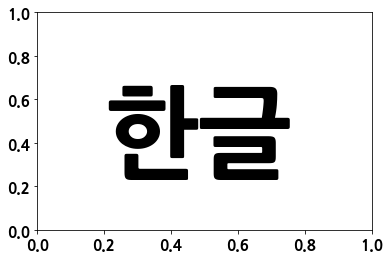

In [3]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["font.size"] = 15


# 한글 폰트 적용되었나 테스트 (깨진다면 Restart session 필요)
plt.text(0.2, 0.3, '한글', size=100) 

명사 추출 중...


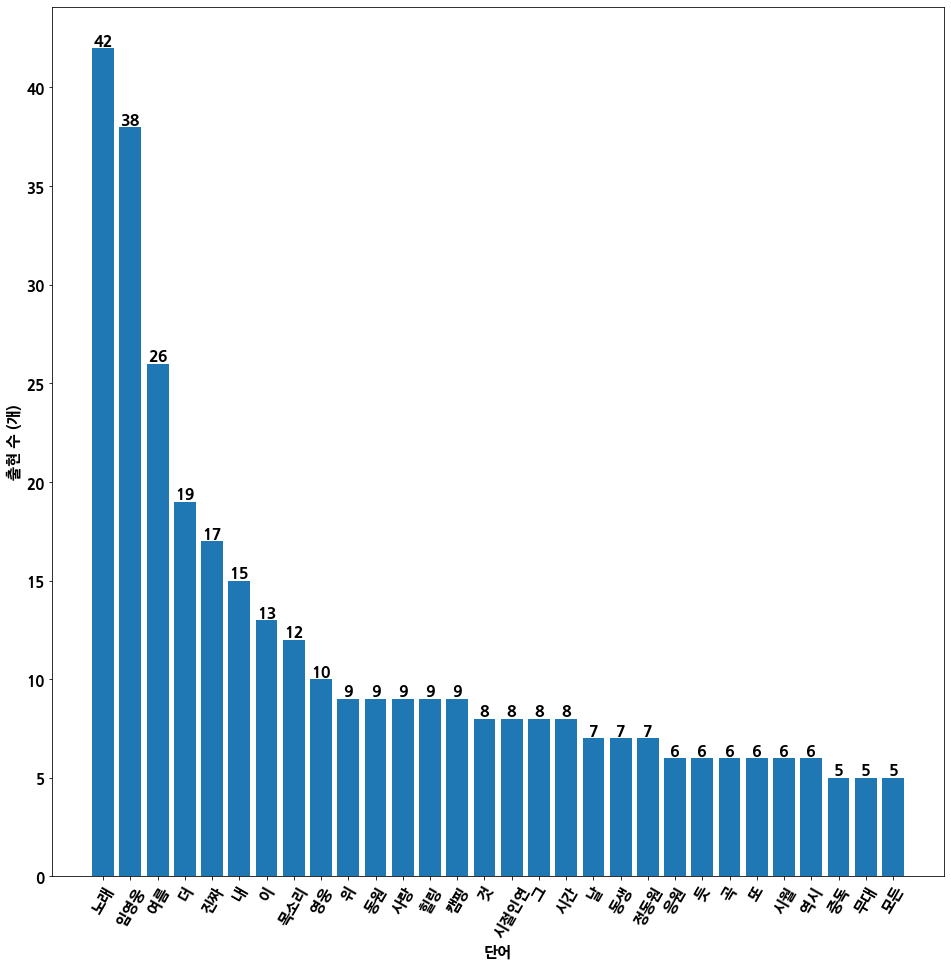

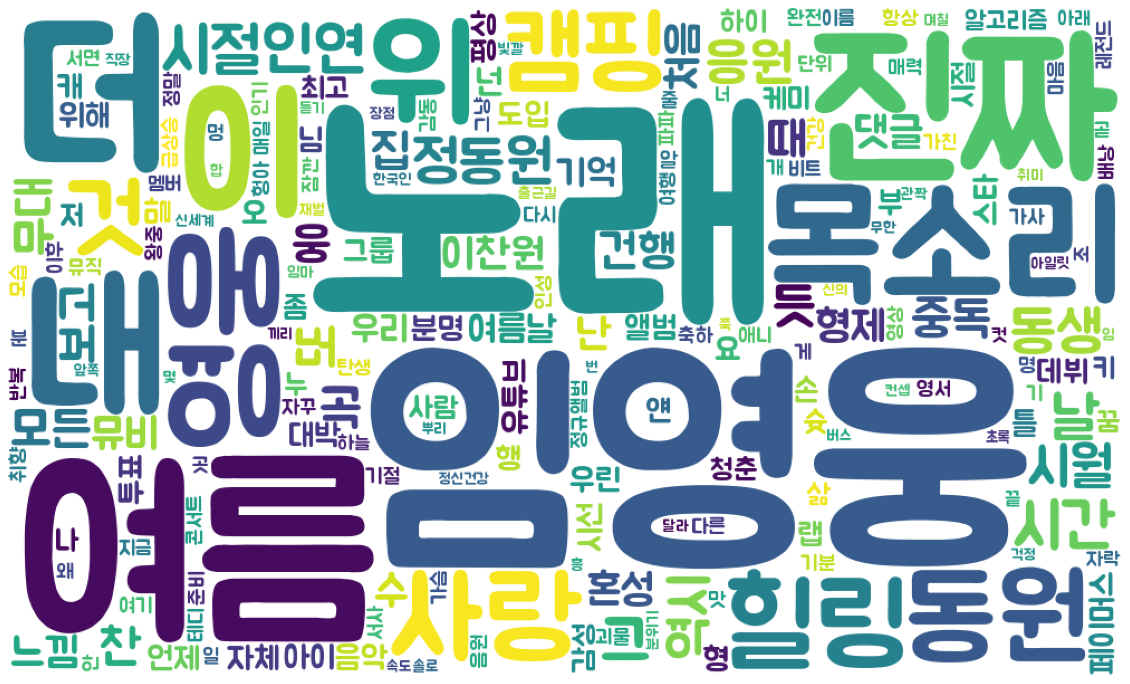

In [4]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw, kobill
from nltk import Text
import datetime
from utils.visualize import plot_frequency_chart, draw_word_cloud


print('명사 추출 중...')
day = datetime.date.today().strftime('%y%m%d')
save_path = f'data/YT_cmts_{day}.txt'
corpus = open(save_path, encoding='utf-8').read()[:100_000] # 100,000 글자만 분석 (슬라이싱 코드 지우면 전부 분석)

# 다른 예제 말뭉치
# corpus = kolaw.open('./constitution.txt').read() # 위 코드를 주석 처리하고 corpus를 바꿔보세요
# corpus = kobill.open('./1809890.txt').read()

words = Text(Okt().nouns(corpus))
plot_frequency_chart(words, top_n=30)
draw_word_cloud(words, font_path='./source/font/주아체.ttf')